# Kyle Sunden - HW4 Absorption, Refraction, etc.

In [127]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1

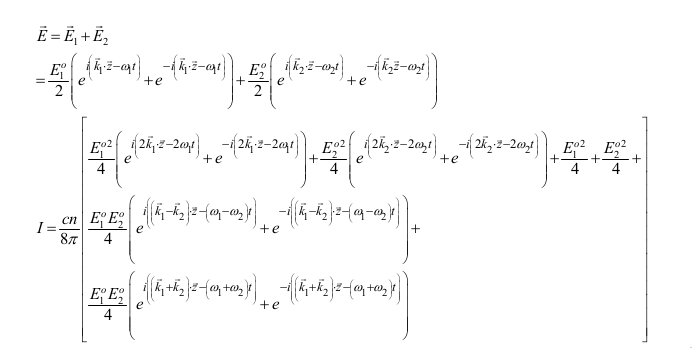

In [147]:
from IPython.display import Image
Image('./image.png', embed=True)

# 2

In [128]:
mu_ba = 4.1e-30 # C m
c = 2.998e8 # m/s
hbar = 1.05457148e-34 # J s
epsilon_0 = 8.854187817620e-12 # F/m
omega = c / np.linspace(450e-9, 700e-9, 200) # 1/s
omega_ba = c / 530e-9 # 1/s
Gamma_ba = -c / 545e-9 + omega_ba # 1/s
delta_ba = omega_ba - omega - 1j * Gamma_ba # 1/s

sigma = 4 * np.pi * omega * mu_ba ** 2 * Gamma_ba / hbar / epsilon_0 / c / (delta_ba * delta_ba.conj())

/home/jupyter/env/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


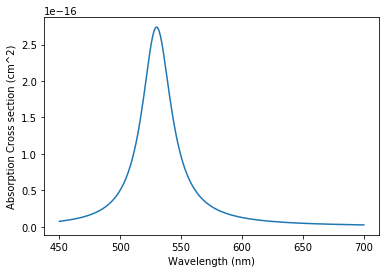

In [129]:
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorption Cross section (cm^2)')
plt.plot(c / omega * 1e9, sigma * (100)**2)

In [130]:
ind_ref = 1

In [131]:
number_density = 1e-4 / 1000 * 6.022e23 * (100)**3 # molecules/m^3
F = (ind_ref ** 2 + 2) / 3
ind_ref = 1 + number_density * F * mu_ba ** 2 * delta_ba.real / 2 / hbar / epsilon_0 / (delta_ba * delta_ba.conj())

/home/jupyter/env/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


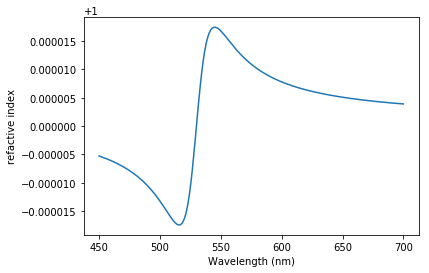

In [132]:
plt.xlabel('Wavelength (nm)')
plt.ylabel('refactive index')
plt.plot(c / omega * 1e9, ind_ref)

There is almost no effect from the Rhodamine

# 3
## a
$\frac{G_{stim. fl.}}{G_{raman}} = \frac{2 \Gamma^{*}_{ca}\Gamma_{cb}|{\Delta_{ba}}|^2}{\Gamma_{cc}\Gamma_{ba}|{\Delta_{cb}}|^2}$

In [133]:
import scipy.integrate as integrate   # SciPy provides more capabilities. Here we are calling the integration library of the SciPy library and calling it integrate
from scipy.special import hermite

In [134]:
wavelength = np.linspace(350,650,1000)
vib_freq = 1400#1386
q = np.linspace(-10,10,100)
omega = 1e7/wavelength
xg = 0
xe = 1.3

omega_e = 1e7/480
omega_e_fl = 1e7/480
gamma = 275

n_vibrational_levels = 15

In [135]:
# The code provided above used explicit functions for the Hermite polynomials. You can also use the Hermite polynomial function in the SciPy library.
# The following code was developed by a class member and used to display the individual vibronic contributions to the absorption spectrum.
# It is included here as an example of more powerful code that can be used when there are a large number of vibronic transitions such as the 
# calculation of the iodine absorption spectrum.

def psi(x, v):
    """Generate a wavefunction.
    
    Parameters
    ----------
    x: scalar or ndarray
        Coordinate of evaluation
    v: int
        Vibrational quantum number
    """
    return np.exp(-x ** 2 / 2)/np.sqrt((2. ** v) * np.math.factorial(v))*hermite(v)(x)


def lorentzian(freq, gamma, omega):
    return(gamma/((freq-omega)**2+gamma**2))

def overlap(q, xg, xe, v_ground, v_excited):
    return psi(q + xg, v_ground) * psi(q + xe, v_excited)

In [136]:
# Compute the Franck-Condon factors
# range(x) generates the sequence [0, 1, 2, 3, 4, ..., x-1] (i.e. x numbers from 0 to x-1)
# Here, we are doing a computation for each value of ``i`` from 0 to n_vibrational_levels-1, inclusive
franck_condon = []
for i in range(n_vibrational_levels):
    # integrate.quad computes a definite integral of a function, with the lower and upper bounds
    # Additional arguments to the function are supplied by the keword argument `args`
    # integrate.quad returns two numbers, but we are only interested in the first (hence the `[0]`)
    #    More information can be found here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html
    franck_condon.append(abs(integrate.quad(overlap, -np.inf, np.inf, args=(xg,xe,0,i))[0])**2)

In [137]:
franck_condon_fl = []
for i in range(n_vibrational_levels):
    franck_condon_fl.append(abs(integrate.quad(overlap, -np.inf, np.inf, args=(xg,xe,i,0))[0])**2)

In [138]:
# Compute the absorbance as the sum of several lorentzians, shifted by their vibrational energy
#    and scaled by their Franck-Condon factor
absorbance = np.zeros_like(omega)
for i in range(n_vibrational_levels):
    absorbance += lorentzian(omega_e + i * vib_freq, gamma, omega)*franck_condon[i]*omega
# note that the += symbol is an operator that adds the results of a calculation onto the results of the previous calculation. -=, *=, and /= do similar things.
    
# Normalize 
absMax = absorbance.max()
absorbance /= absMax

florescence = np.zeros_like(omega)
for i in range(n_vibrational_levels):
    florescence += lorentzian(omega_e_fl - i * vib_freq, gamma, omega)*franck_condon[i]*omega
    
raman_peaks = [75, 120, 1175, 1200, 1390, 1530]
raman_gamma = [10, 20, 4, 7, 10, 2]
raman_height = [2, 5.5, 3, 4.5, 8, 11]
raman = np.zeros_like(omega)
for p,g,h in zip(raman_peaks, raman_gamma, raman_height):
    raman += lorentzian(1e7/480 + p, g, omega) * h
    
    
# Normalize 
flMax = florescence.max()
florescence /= flMax

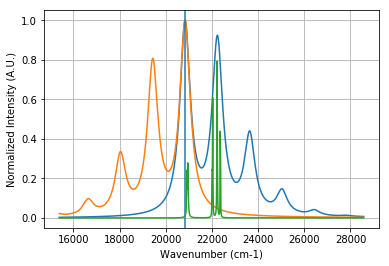

In [139]:
# b 
# Plot the absorption spectrum
#plt.plot(wavelength,absorbance)
plt.plot(omega,absorbance)

plt.plot(omega,florescence)
plt.axvline(1e7/480)
plt.plot(omega,raman)

plt.xlabel("Wavenumber (cm-1)")
plt.ylabel("Normalized Intensity (A.U.)")
plt.grid()

## c 
The transition appears to be the mode at 1390-1400 cm-1. There is a large raman transition in this region

## d
The raman transitions are much sharper. This is due to the raman being on resonance, such that the detuning terms are smaller

In [140]:
# e

Gamma_ba = 10 # cm-1
Gamma_ca = 275 # cm -1
Gamma_cb = 275 # cm-1
Gamma_cc = Gamma_ca + Gamma_cb - Gamma_ba

omega = 1e7 / 480 #excitation
omega_ba = 1390
omega_cb = 1e7 / 477 - omega_ba

delta_cb = omega_cb - omega - 1j * Gamma_cb
delta_ba = omega_ba - omega - 1j * Gamma_ba

ratio = ( np.real(2 * delta_cb * delta_cb.conjugate() * Gamma_cb * Gamma_ca / 
      (delta_ba * delta_ba.conjugate()) / Gamma_ba / Gamma_cc))
print(ratio, 'stim fl / raman')

0.12303675645900854 stim fl / raman


In [141]:
Gamma_cc

540

In [142]:
# f 

omega = 1e7 / 1060
delta_cb = omega_cb - omega - 1j * Gamma_cb
delta_ba = omega_ba - omega - 1j * Gamma_ba

detuned = ( np.real(2 * delta_cb * delta_cb.conjugate() * Gamma_cb * Gamma_ca / 
      (delta_ba * delta_ba.conjugate()) / Gamma_ba / Gamma_cc))
print(detuned, 'stim fl / raman')
print(detuned / ratio, 'times weaker') 
print(ratio / detuned * 100, 'Percent') 


44.54410310132733 stim fl / raman
362.03899048791845 times weaker
0.2762133433894245 Percent
